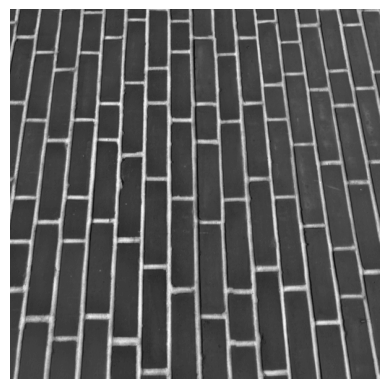

In [ ]:
# Importa las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, morphology
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, jaccard_score

# 1. Carga y Preprocesamiento de Datos
# Ruta a las imágenes y máscaras
img_path = "ruta_a_la_imagen_aerea.png"  # Cambia esta ruta a tu imagen
mask_path = "ruta_a_la_mascara_ground_truth.png"  # Cambia esta ruta a la máscara de ground truth

# Carga la imagen y la máscara
image = io.imread(img_path)
mask = io.imread(mask_path) // 255  # Normaliza la máscara a valores binarios si no lo está

# Visualiza la imagen y la máscara
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(image)
ax[0].set_title("Imagen aérea")
ax[1].imshow(mask, cmap="gray")
ax[1].set_title("Máscara Ground Truth")
plt.show()

# 2. Segmentación de Carreteras
# Convierte la imagen a escala de grises
gray_image = color.rgb2gray(image)

# Aplica un filtro de detección de bordes o un umbral adaptativo
edges = filters.sobel(gray_image)  # Detección de bordes usando el filtro Sobel
thresh = filters.threshold_otsu(edges)  # Umbral usando Otsu
binary_segmentation = edges > thresh  # Segmentación binaria

# Opcional: Limpieza morfológica para reducir el ruido
binary_segmentation = morphology.remove_small_objects(binary_segmentation, min_size=50)

# Visualiza la segmentación binaria
plt.imshow(binary_segmentation, cmap="gray")
plt.title("Máscara Segmentada")
plt.show()

# 3. Evaluación de la Segmentación
# Convierte la segmentación y la máscara a vectores para comparar
mask_flat = mask.ravel()
segmentation_flat = binary_segmentation.ravel()

# Métricas de evaluación
accuracy = accuracy_score(mask_flat, segmentation_flat)
f1 = f1_score(mask_flat, segmentation_flat)
iou = jaccard_score(mask_flat, segmentation_flat)

print(f"Exactitud: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"IoU (Intersección sobre Unión): {iou:.4f}")
